In [1]:
import numpy as np                             #importing important libraries
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

In [2]:
data=np.loadtxt('Binary_data 2.csv',delimiter=',')         #input data

In [3]:
time,rshift1,rshift2=data.T                               #storing data in variables

Text(0, 0.5, 'Redshift')

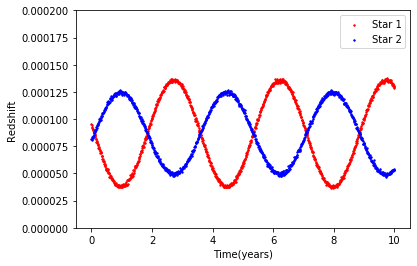

In [4]:
plt.scatter(time,rshift1,s=2,c='red',label='Star 1')      #making a graph to have a general idea
plt.ylim(0.000,0.0002)
plt.scatter(time,rshift2,s=2,c='blue',label='Star 2')
plt.legend()
plt.xlabel('Time(years)')
plt.ylabel('Redshift')

In [5]:
from astropy import constants as const

In [6]:
value1=np.amax(rshift1)*const.c  #Considering that the plane of the system is parallel to line of sight,
value2=np.amin(rshift1)*const.c  #the maximum redshift will be v+v1 and minimum will be v-v1, because relative motion
value3=np.amax(rshift2)*const.c  #will be sum when system and star is travelling in the same direction, and vice versa
value4=np.amin(rshift2)*const.c  #hence, v= (redshift max + redshift min)/2.
vel1=(value1+value2)/2           #Since for star 1 and 2 we get somewhat different values of system velocity, average is taken
vel2=(value3+value4)/2
finvel=(vel1+vel2)/2
print(finvel,vel1,vel2)

26088.77364283004 m / s 26097.707982715245 m / s 26079.83930294484 m / s


In [7]:
adjust1=rshift1*const.c-vel1  # redshift=relative velocity/speed of light (not relativistic formula)
adjust2=rshift2*const.c-vel2  #subtract system velocity so that now our reference frame has the COM at rest

Text(0, 0.5, 'Apparent Redshift Velocity')

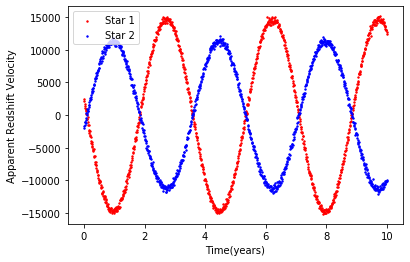

In [8]:
plt.scatter(time,adjust1,s=2,c='red',label='Star 1')   #plotting absolute velocities vs time
plt.scatter(time,adjust2,s=2,c='blue',label='Star 2')
plt.legend()
plt.xlabel('Time(years)')
plt.ylabel('Apparent Redshift Velocity')

In [9]:
def func(x,a,b):          #function to fit a sinusoid
    return a*np.sin(b*x)

In [11]:
opt1,cov1=cf(func,time,adjust1,p0=(30000,2))  #implementing the curve fit, we pass approximate guessed values. Try removing p0
opt2,cov2=cf(func,time,adjust2)               #and see how the curve now looks. Rationalize this result using curve_fit 
                                              #documentation. Similarly, find why star 2 has no need of this.

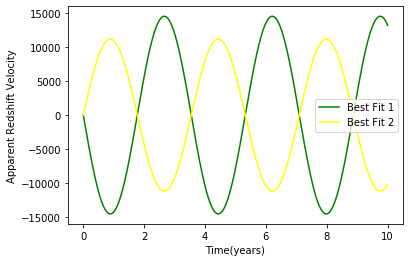

In [12]:
#plt.scatter(time,adjust1,s=2,c='red',label='Star 1')    #remove these hashes to see how the curve fit actually fits the data
#plt.scatter(time,adjust2,s=2,c='blue',label='Star 2')   #these are the best fit sinusoidal curves
plt.xlabel('Time(years)')
plt.ylabel('Apparent Redshift Velocity')
plt.plot(time,func(time,*opt1),label='Best Fit 1',color='g')
plt.plot(time,func(time,*opt2),label='Best Fit 2',color='yellow')
plt.legend()

In [13]:
vel1=-opt1[0]      #notice that the curve for star 1 begins with the star moving towards us, hence we get a negative value of  
vel2=opt2[0]       #parameter, which is our velocity
print(vel1,vel2)

14559.774783291372 11202.73762915629


In [14]:
from astropy.timeseries import LombScargle    #importing LombScargle periodogram

In [15]:
frequency, power = LombScargle(time,func(time,*opt2)).autopower()

Text(0, 0.5, 'Power')

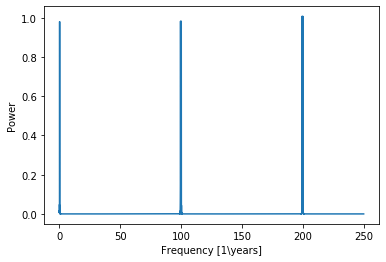

In [16]:
plt.figure()                      #Notice that we get 3 peaks. We know by looking at previous graphs value lies between 3-4 yrs
plt.plot(frequency, power)      
plt.xlabel('Frequency [1\years]')
plt.ylabel('Power')

Text(0, 0.5, 'Power')

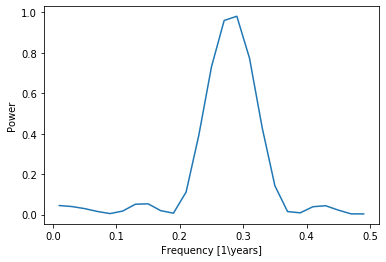

In [17]:
index=np.where(frequency>0.5)         #hence frequency<0.5, eliminate the rest of the peaks. Question: Why three peaks?
frequency=np.delete(frequency,index)  #Now, we get a plot with the peak as the correct value of the frequency
power=np.delete(power,index)
plt.figure()
plt.plot(frequency, power)
plt.xlabel('Frequency [1\years]')
plt.ylabel('Power')

In [18]:
from astropy import units as u   #importing units

In [19]:
index=np.where(power==np.amax(power))      #the peak of the power frequency graph is the actual frequency
finalfreq=frequency[index]
period=(1/finalfreq)*u.yr                  #period is inverse of frequency
print(period)

[3.44827586] yr


In [20]:
vel1=vel1*u.m/u.s                         #appropriate units 
vel2=vel2*u.m/u.s

In [21]:
mass1=(vel2*(vel1+vel2)**2)*period.to(u.s)/(2*np.pi*const.G)  #derived formula put to use to find final masses
mass2=(vel1*(vel1+vel2)**2)*period.to(u.s)/(2*np.pi*const.G)
print(mass1,mass2)

[1.92945781e+30] kg [2.5076434e+30] kg
